# Error-driven Payoff

In [1]:
import sys
sys.path.append("../src")

import warnings
warnings.filterwarnings("ignore")

In [2]:
from Classes.cognitive_model_agents import PayoffM1, PayoffM2, PayoffM3
from Utils.unit_tests import (
    test_bar_is_full, 
    test_bar_has_capacity,
    test_alternation
)

In [3]:
fixed_parameters = {
	"threshold":0.5,
	"num_agents":2,
}
free_parameters = {
	"learning_rate": 0.2,
	"inverse_temperature":16
}

In [11]:
from Classes.bar import Bar
from Utils.interaction import Episode
from Utils.plot_utils import PlotStandardMeasures


simulation_parameters = {
	'num_episodes':100,
	'num_rounds':1000,
	'verbose':False
}

def plot_efficiency(agent_class):
    num_agents = fixed_parameters['num_agents']
    threshold = fixed_parameters['threshold']
    num_rounds = simulation_parameters['num_rounds']
    num_episodes = simulation_parameters['num_episodes']

    #-------------------------------
    # Create agents and bar
    #-------------------------------
    agents = [
        agent_class(
            free_parameters=free_parameters, 
            fixed_parameters=fixed_parameters, 
            n=n
        ) for n in range(num_agents)
    ]
    agents[0].designated_agent = True
    bar = Bar(num_agents=num_agents, threshold=threshold)
    #-------------------------------
    # Create simulation
    #-------------------------------
    episode = Episode(
        environment=bar,\
        agents=agents,\
        model='',\
        num_rounds=num_rounds
    )
    #-------------------------------
    # Run simulation
    #-------------------------------
    df = episode.simulate(
        num_episodes=num_episodes,
        verbose=False
    )

    #-------------------------------
    # Plot
    #-------------------------------
    p = PlotStandardMeasures(df)
    measures = ['efficiency']
    p.plot_measures(
        measures=measures, 
        folder=None,
    )

  0%|          | 0/100 [00:00<?, ?it/s]

Plotting efficiency...


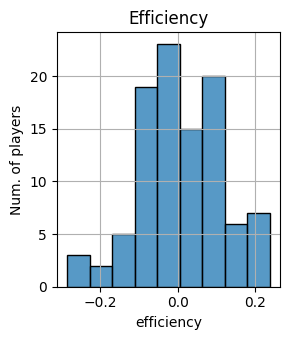

In [15]:
agent_class = PayoffM2
free_parameters = {
	"learning_rate": 0.3,
	"inverse_temperature":1,
}
plot_efficiency(agent_class)

  0%|          | 0/100 [00:00<?, ?it/s]

Plotting efficiency...


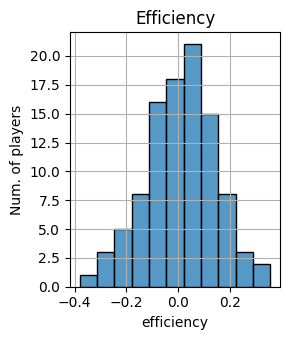

In [ ]:
from Classes.cognitive_model_agents import FairnessM2

agent_class = FairnessM2
free_parameters = {
	"learning_rate": 0.3,
	"inverse_temperature":1,
    'bias':0
}
# free_parameters = {
#     'bias': 0.41702200470257406, 
#     'inverse_temperature': 46.38044308685596, 
#     'learning_rate': 0.000114374817344
# }
plot_efficiency(agent_class)

In [ ]:
from pathlib import Path

image_folder_all = Path('../images/Payoff')
image_folder_all.mkdir(parents=True, exist_ok=True)
image_folder_M1 = Path('../images/Payoff/M1')
image_folder_M1.mkdir(parents=True, exist_ok=True)
image_folder_M2 = Path('../images/Payoff/M2')
image_folder_M2.mkdir(parents=True, exist_ok=True)
image_folder_M3 = Path('../images/Payoff/M3')
image_folder_M3.mkdir(parents=True, exist_ok=True)

1. [M1](#m1)
2. [M2](#m2)
3. [M3](#m3)

## M1 <a class="anchor" id="m1"></a>

In [ ]:
agent = PayoffM1(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_bar_has_capacity(agent)

In [ ]:
agent = PayoffM1(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_bar_is_full(agent)

In [ ]:
agent = PayoffM1(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_alternation(agent)

In [ ]:
fixed_parameters = {
	"threshold":0.5,
	"num_agents":6,
}
free_parameters = {
	"learning_rate": 0.2,
	"inverse_temperature":16
}
simulation_parameters = {
	'num_episodes':100,
	'num_rounds':1000,
	'verbose':False
}

In [ ]:
import numpy as np
from Utils.interaction import Performer

LaTeX_string = Performer.sweep(
    agent_class=PayoffM1,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    sweep_parameter='learning_rate',
    values=[0, 0.05, 0.1, 0.2, 0.4, 0.8],
    image_folder=image_folder_M1,
    measures=['conditional_entropy', 'entropy', 'efficiency', 'inequality']
)

In [ ]:
LaTeX_string = Performer.sweep(
    agent_class=PayoffM1,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    sweep_parameter='inverse_temperature',
    values=[2**x for x in range(0, 7)],
    image_folder=image_folder_M1,
    measures=['entropy', 'efficiency']
)

LaTeX_string = Performer.simple_plots(
	agent_class=QAttendance,
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	simulation_parameters=simulation_parameters,
	measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy'],
	image_folder=image_folder
)

In [ ]:
from Utils.interaction import Experiment

exp = Experiment(
    agent_class=PayoffM1,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy']
)

In [ ]:
exp.run_sweep2(
    parameter1='inverse_temperature',
    values1=[2**x for x in range(0, 7)],
    parameter2='learning_rate',
    values2=[0, 0.05, 0.1, 0.2, 0.4, 0.8],
    file=image_folder_M1 / 'sweep_inverse_temp_vs_learning_rate'
)

In [ ]:
from Utils.plot_utils import PlotStandardMeasures

p = PlotStandardMeasures(exp.data)

In [ ]:
p.plot_sweep2(
    parameter1='inverse_temperature', 
    parameter2='learning_rate',
    measure='entropy',
    file=image_folder_M1 / Path('entropy_sweep_inverse_temp_vs_learning_rate.png')
)

In [ ]:
p.plot_sweep2(
    parameter1='inverse_temperature', 
    parameter2='learning_rate',
    measure='efficiency',
    file=image_folder_M1 / Path('efficiency_sweep_inverse_temp_vs_learning_rate.png')
)

---

## M2 <a class="anchor" id="m2"></a>

In [ ]:
fixed_parameters = {
	"threshold":0.5,
	"num_agents":2,
}
free_parameters = {
	"learning_rate": 0.2,
	"inverse_temperature":16
}
agent = PayoffM2(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_bar_has_capacity(agent)

In [ ]:
agent = PayoffM2(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_bar_is_full(agent)

In [ ]:
agent = PayoffM2(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_alternation(agent)

In [ ]:
fixed_parameters = {
	"threshold":0.5,
	"num_agents":6,
}
free_parameters = {
	"learning_rate": 0.2,
	"inverse_temperature":16
}
simulation_parameters = {
	'num_episodes':100,
	'num_rounds':1000,
	'verbose':False
}

In [ ]:
import numpy as np
from Utils.interaction import Performer

LaTeX_string = Performer.sweep(
    agent_class=PayoffM2,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    sweep_parameter='learning_rate',
    values=[0, 0.05, 0.1, 0.2, 0.4, 0.8],
    image_folder=image_folder_M2,
    measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy']
)

In [ ]:
LaTeX_string = Performer.sweep(
    agent_class=PayoffM2,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    sweep_parameter='inverse_temperature',
    values=[2**x for x in range(0, 7)],
    image_folder=image_folder_M2,
    measures=['entropy', 'efficiency']
)

In [ ]:
from Utils.interaction import Experiment

exp = Experiment(
    agent_class=PayoffM2,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy']
)

In [ ]:
exp.run_sweep2(
    parameter1='inverse_temperature',
    values1=[2**x for x in range(0, 7)],
    parameter2='learning_rate',
    values2=[0, 0.05, 0.1, 0.2, 0.4, 0.8],
    file=image_folder_M2 / 'sweep_inverse_temp_vs_learning_rate'
)

In [ ]:
from Utils.plot_utils import PlotStandardMeasures

p = PlotStandardMeasures(exp.data)

In [ ]:
p.plot_sweep2(
    parameter1='inverse_temperature', 
    parameter2='learning_rate',
    measure='efficiency',
    file=image_folder_M2 / Path('efficiency_sweep_inverse_temp_vs_learning_rate.png')
)

In [ ]:
p.plot_sweep2(
    parameter1='inverse_temperature', 
    parameter2='learning_rate',
    measure='entropy',
    file=image_folder_M2 / Path('entropy_sweep_inverse_temp_vs_learning_rate.png')
)

---

## M3 <a class="anchor" id="m3"></a>

In [ ]:
fixed_parameters = {
	"threshold":0.5,
	"num_agents":2,
}
free_parameters = {
	"learning_rate": 0.2,
	"inverse_temperature":16
}
agent = PayoffM3(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_bar_has_capacity(agent)

In [ ]:
agent = PayoffM3(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_bar_is_full(agent)

In [ ]:
agent = PayoffM3(
	fixed_parameters=fixed_parameters,
	free_parameters=free_parameters,
	n=0
)
agent.debug = True
test_alternation(agent)

In [ ]:
fixed_parameters = {
	"threshold":0.5,
	"num_agents":6,
}
free_parameters = {
	"learning_rate": 0.2,
	"inverse_temperature":16
}
simulation_parameters = {
	'num_episodes':100,
	'num_rounds':1000,
	'verbose':False
}

In [ ]:
import numpy as np
from Utils.interaction import Performer

LaTeX_string = Performer.sweep(
    agent_class=PayoffM3,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    sweep_parameter='learning_rate',
    values=[0, 0.05, 0.1, 0.2, 0.4, 0.8],
    image_folder=image_folder,
    measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy']
)

In [ ]:
LaTeX_string = Performer.sweep(
    agent_class=PayoffM3,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    sweep_parameter='inverse_temperature',
    values=[2**x for x in range(0, 7)],
    image_folder=image_folder,
    measures=['entropy', 'efficiency']
)

In [ ]:
from Utils.interaction import Experiment

exp = Experiment(
    agent_class=PayoffM3,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy']
)

In [ ]:
exp.run_sweep2(
    parameter1='inverse_temperature',
    values1=[2**x for x in range(0, 7)],
    parameter2='learning_rate',
    values2=[0, 0.05, 0.1, 0.2, 0.4, 0.8],
    file=image_folder / 'sweep_inverse_temp_vs_learning_rate'
)

In [ ]:
from Utils.plot_utils import PlotStandardMeasures

p = PlotStandardMeasures(exp.data)

In [ ]:
p.plot_sweep2(
    parameter1='inverse_temperature', 
    parameter2='learning_rate',
    measure='efficiency',
    file=image_folder / Path('efficiency_sweep_inverse_temp_vs_learning_rate.png')
)

In [ ]:
p.plot_sweep2(
    parameter1='inverse_temperature', 
    parameter2='learning_rate',
    measure='entropy',
    file=image_folder / Path('entropy_sweep_inverse_temp_vs_learning_rate.png')
)

---

In [ ]:
from Utils.interaction import Performer

fixed_parameters = {
	"threshold":0.5,
	"num_agents":6,
}
free_parameters = {
	"learning_rate": 0.2,
	"inverse_temperature":16
}
simulation_parameters = {
	'num_episodes':100,
	'num_rounds':1000,
	'verbose':False
}

list_dicts = [
    {
        'agent_class': PayoffM1,
        'fixed_parameters': fixed_parameters,
        'free_parameters': free_parameters,
        'simulation_parameters': simulation_parameters,
        'seed': 7
    },
    {
        'agent_class': PayoffM2,
        'fixed_parameters': fixed_parameters,
        'free_parameters': free_parameters,
        'simulation_parameters': simulation_parameters,
        'seed': 9
    },
    {
        'agent_class': PayoffM3,
        'fixed_parameters': fixed_parameters,
        'free_parameters': free_parameters,
        'simulation_parameters': simulation_parameters,
        'seed': 0
    }
]

In [ ]:
#-------------------------------
# Create plots
#-------------------------------
perf = Performer.simple_vs(
    list_dicts=list_dicts,
    image_folder=image_folder_all,
    measures=['efficiency', 'inequality', 'entropy', 'conditional_entropy'],
    kwargs={
        'T': 20,
        'model_names': {
            'Payoff-M1-7': 'M1',
            'Payoff-M2-9': 'M2',
            'Payoff-M3-0': 'M3'
        },
        'figsize': (3.5, 3)
    }
)

---

In [ ]:
from Utils.interaction import Performer

fixed_parameters = {
	"threshold":0.5,
	"num_agents":6,
}
free_parameters = {
	'inverse_temperature':16,
	'learning_rate':1.2
}
simulation_parameters = {
	'num_episodes':1,
	'num_rounds':1000,
	'verbose':False
}

In [ ]:
LaTeX_string = Performer.simple_run(
    agent_class=PayoffM1,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    image_folder=image_folder_M1,
    measures=['render']
)

In [ ]:
LaTeX_string = Performer.simple_run(
    agent_class=PayoffM2,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    image_folder=image_folder_M2,
    measures=['render']
)

In [ ]:
LaTeX_string = Performer.simple_run(
    agent_class=PayoffM3,
    fixed_parameters=fixed_parameters,
    free_parameters=free_parameters,
    simulation_parameters=simulation_parameters,
    image_folder=image_folder_M3,
    measures=['render']
)